# Mental Disorder Classification

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Load the dataset
df = pd.read_csv('Dataset-Mental-Disorders.csv')

In [82]:
df.head(10)

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal
5,Patiant-06,Usually,Sometimes,Sometimes,Most-Often,NO,YES,YES,YES,NO,NO,NO,NO,YES,NO,3 From 10,5 From 10,5 From 10,Depression
6,Patiant-07,Seldom,Usually,Seldom,Sometimes,YES,YES,YES,NO,YES,YES,NO,YES,YES,YES,7 From 10,2 From 10,9 From 10,Bipolar Type-1
7,Patiant-08,Usually,Sometimes,Sometimes,Sometimes,NO,NO,NO,NO,YES,NO,NO,NO,NO,YES,5 From 10,5 From 10,5 From 10,Normal
8,Patiant-09,Most-Often,Seldom,Most-Often,Usually,YES,YES,YES,NO,YES,YES,NO,YES,NO,NO,8 From 10,2 From 10,3 From 10,Bipolar Type-2
9,Patiant-10,Usually,Seldom,Most-Often,Sometimes,NO,NO,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,4 From 10,2 From 10,Depression


In [83]:
# Split the entire DataFrame into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123, stratify=df['Expert Diagnose'])

In [84]:
# Suicidal thoughts has 3 levels "NO' "YES" and "Yes "
df["Suicidal thoughts"] = df["Suicidal thoughts"].str.strip().str.upper()

In [85]:
# Check missing values
print(train_df.isnull().sum())

Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64


In [86]:
# Check number of duplicated rows
duplicates = train_df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


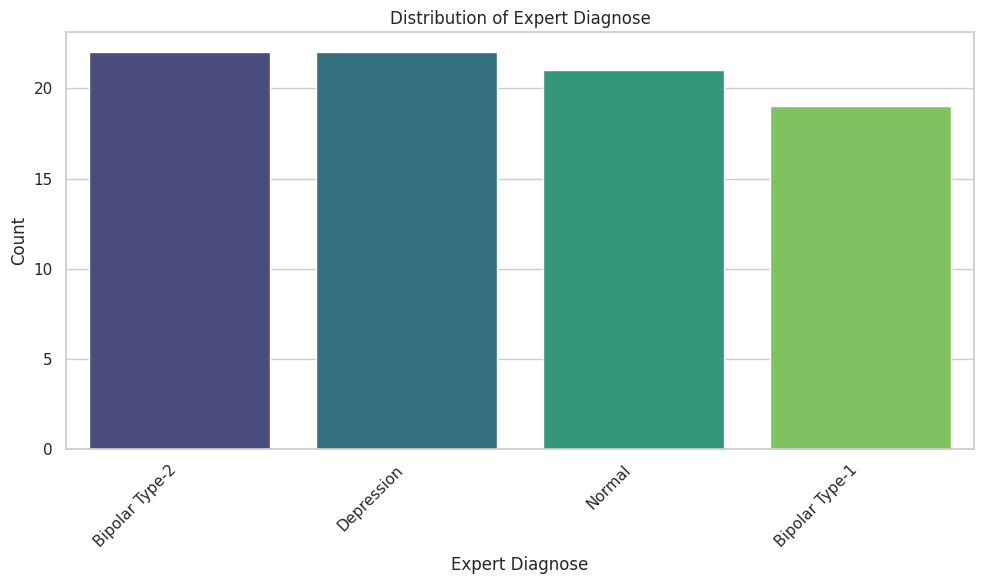

In [87]:
# Display the distribution of the response variable in the original dataframe
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Expert Diagnose', hue='Expert Diagnose', palette='viridis', legend=False)
plt.title('Distribution of Expert Diagnose')
plt.xlabel('Expert Diagnose')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('expert_diagnose_overall_distribution.png')
plt.show() # Uncomment to display the plot during execution

In [88]:
# Fix column name issues (capitalize and correct spelling)
columns_to_convert = ['Sexual Activity', 'Concentration', 'Optimisim']

# Extract numeric part from strings like "3 From 10" and convert to float
for col in columns_to_convert:
    train_df[col] = train_df[col].str.extract(r'(\d+)').astype(int)

# Display the updated columns to verify
print(train_df[columns_to_convert].head())

    Sexual Activity  Concentration  Optimisim
41                2              2          2
20                6              2          3
94                2              8          4
45                4              4          4
54                2              2          1


## Bipolar Type 1

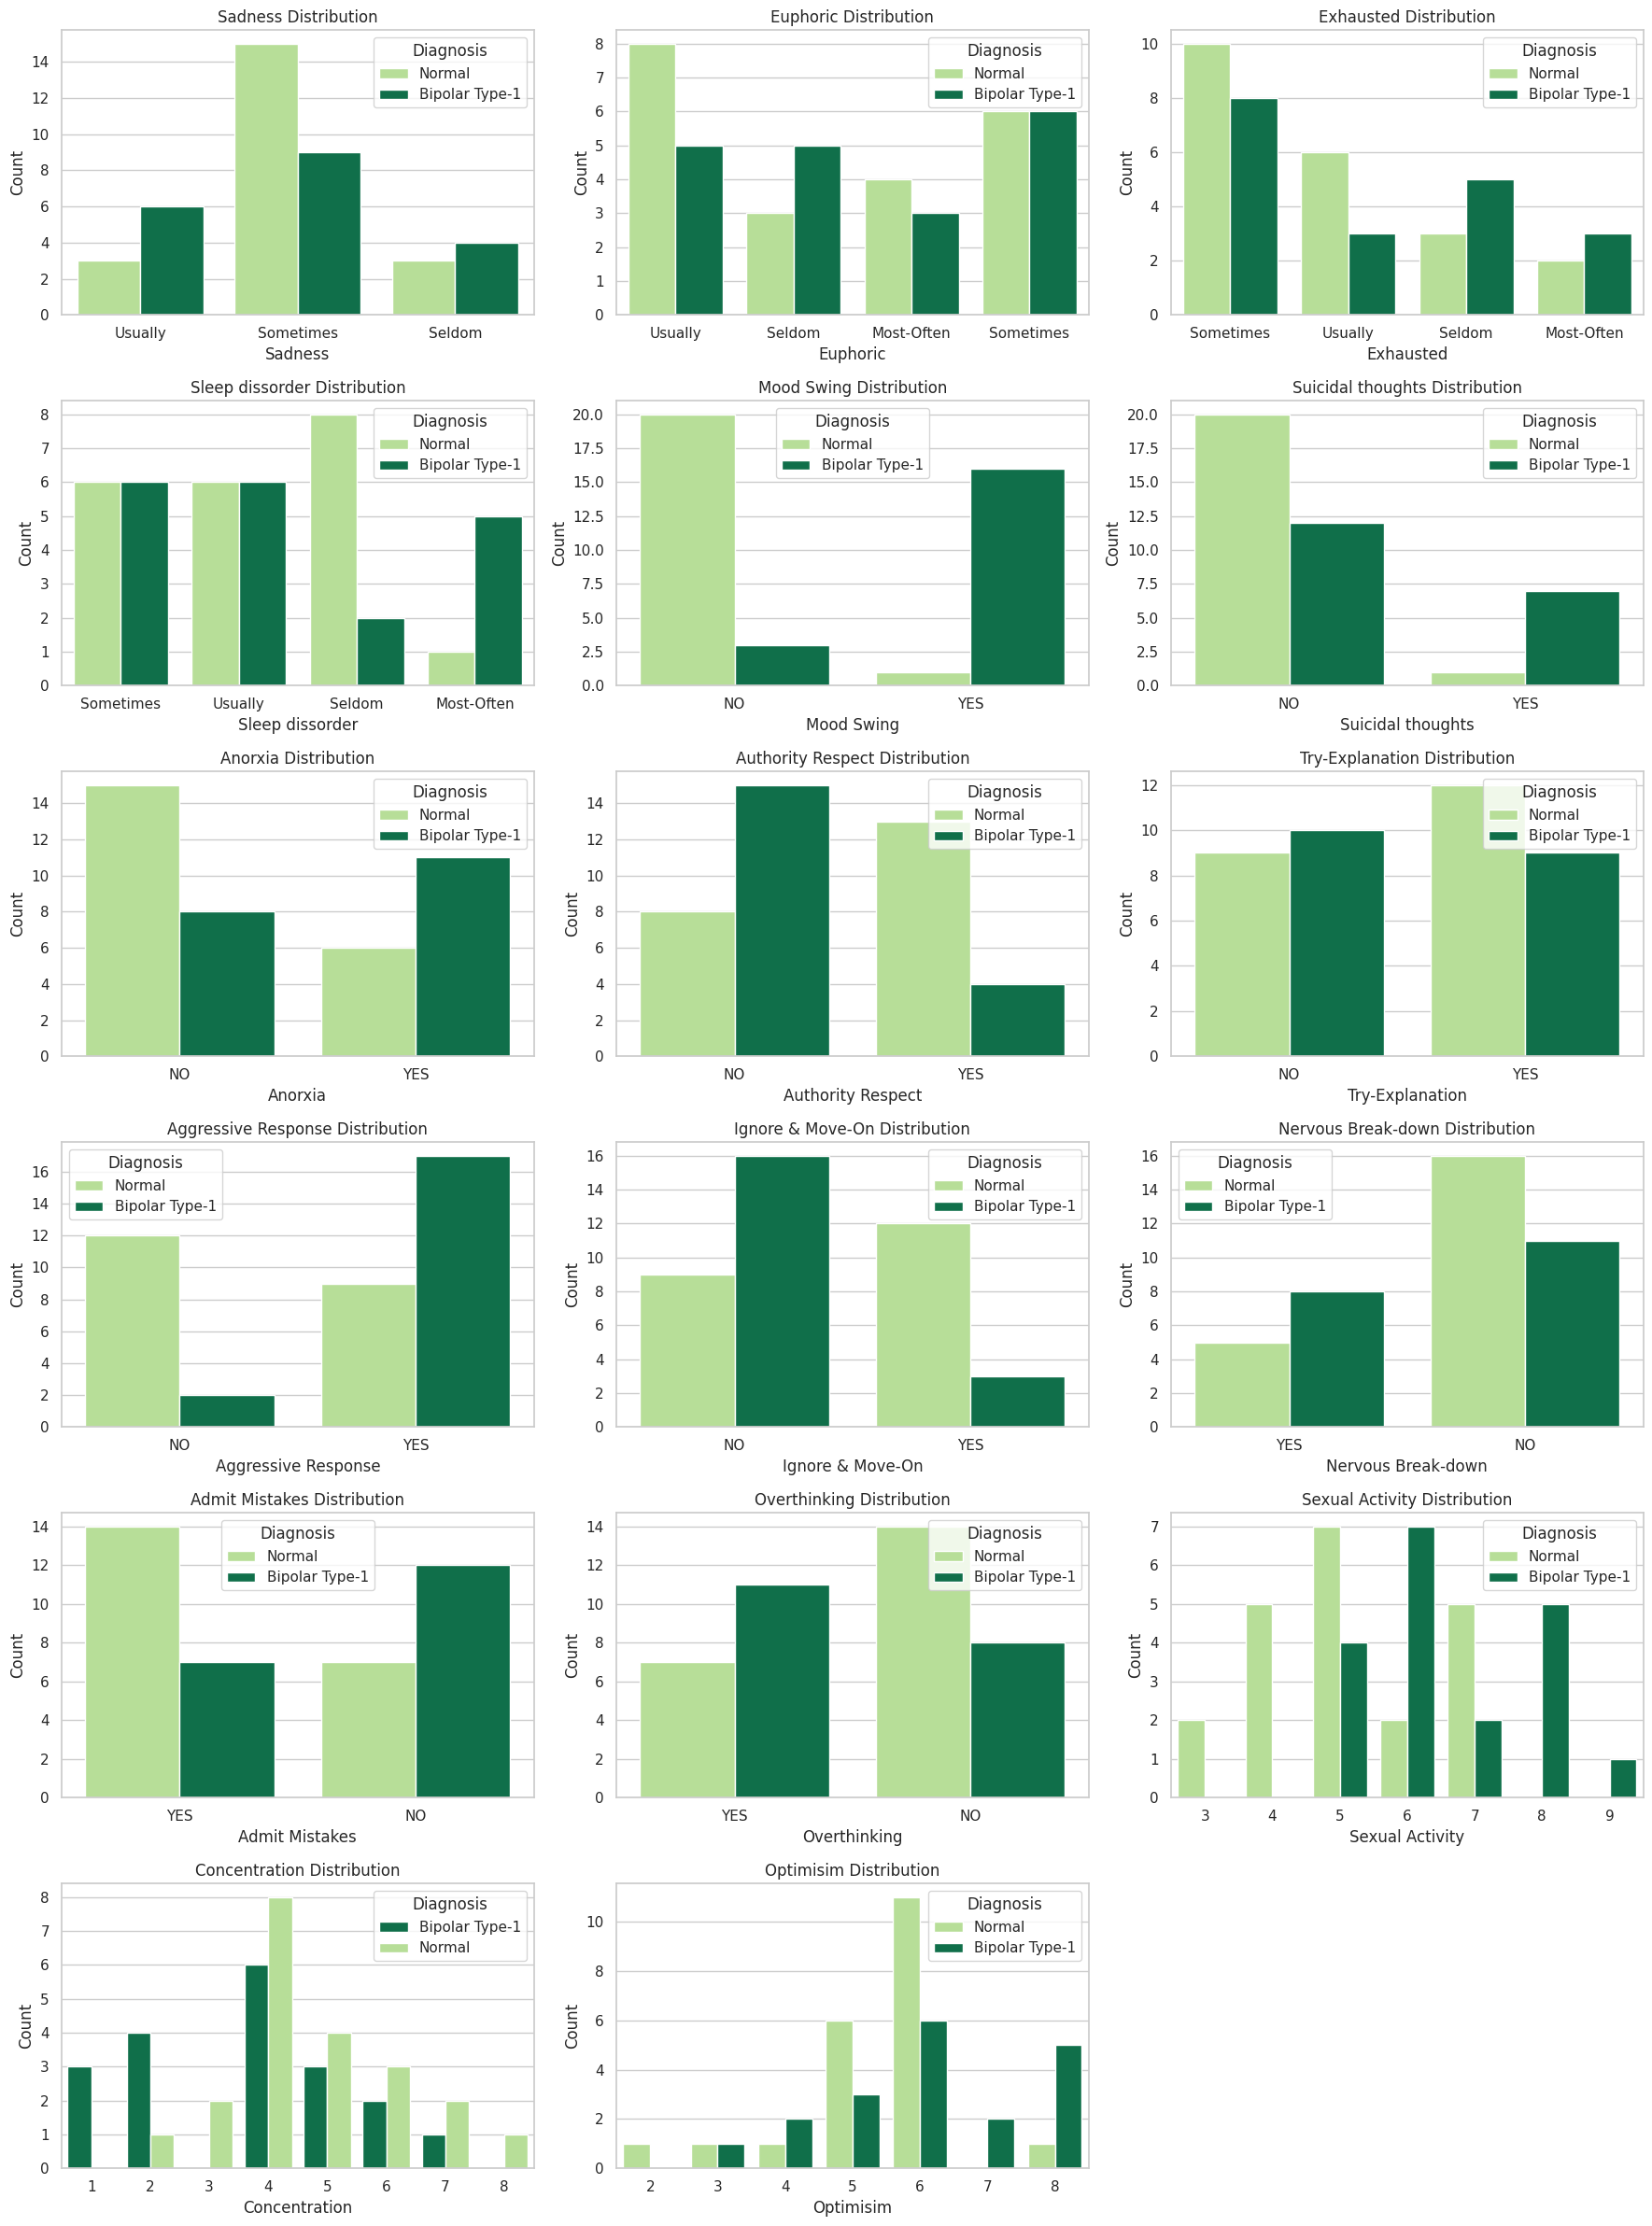

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the diagnosis categories to compare
target_groups = ['Normal', 'Bipolar Type-1']

# Filter only Normal and Bipolar Type 1 individuals
bipolar_df = train_df[train_df['Expert Diagnose'].isin(target_groups)].copy()

# Identify symptom columns (exclude non-symptoms)
exclude_cols = ['Patient Number', 'Expert Diagnose']
symptom_columns = [col for col in train_df.columns if col not in exclude_cols]

# Set plot style
sns.set(style='whitegrid')
num_cols = 3
num_rows = (len(symptom_columns) + num_cols - 1) // num_cols

# Define custom color palette
custom_palette = {'Normal': '#b5ea8c', 'Bipolar Type-1': '#007f4e'}

# Create grouped bar plots
plt.figure(figsize=(6 * num_cols, 4 * num_rows))
for i, symptom in enumerate(symptom_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    ax = sns.countplot(data=bipolar_df, x=symptom, hue='Expert Diagnose', palette=custom_palette)
    plt.title(f'{symptom} Distribution')
    plt.xlabel(symptom)
    plt.ylabel('Count')
    plt.legend(title='Diagnosis')

plt.tight_layout()
plt.show()


#### Mood swing Bipolar Type 1 vs Normal

In [90]:
from scipy.stats import chi2_contingency
# Filter only Normal and Bipolar Type-1 cases
subset_df = train_df[train_df['Expert Diagnose'].isin(['Normal', 'Bipolar Type-1'])]

# Create a contingency table
contingency_table = pd.crosstab(subset_df['Mood Swing'], subset_df['Expert Diagnose'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Result for Mood Swing vs Diagnosis")
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

# Optional: Check significance
alpha = 0.05
if p < alpha:
    print("✅ Statistically significant difference in Mood Swing distribution between Normal and Bipolar Type-1.")
else:
    print("❌ No significant difference in Mood Swing distribution.")

Chi-Square Test Result for Mood Swing vs Diagnosis
Chi2 Statistic: 22.62
Degrees of Freedom: 1
P-value: 0.0000
✅ Statistically significant difference in Mood Swing distribution between Normal and Bipolar Type-1.


In [91]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))


Expert Diagnose  Bipolar Type-1  Normal
Mood Swing                             
NO                       10.925  12.075
YES                       8.075   8.925


#### Concentration Bipolar Type 1 vs Normal

In [92]:
from scipy.stats import mannwhitneyu

# Filter groups
group1 = train_df[train_df['Expert Diagnose'] == 'Normal']['Concentration']
group2 = train_df[train_df['Expert Diagnose'] == 'Bipolar Type-1']['Concentration']

# Run test
stat, p = mannwhitneyu(group1, group2, alternative='greater')
print(f"Mann–Whitney U Test p-value: {p:.4f}")

if p < 0.05:
    print("✅ Significant difference in Concentration levels between groups.")
else:
    print("❌ No significant difference.")

Mann–Whitney U Test p-value: 0.0375
✅ Significant difference in Concentration levels between groups.


#### Sexual Activity Bipolar Type 1 vs Normal

In [93]:
from scipy.stats import mannwhitneyu

# Filter groups
group1 = train_df[train_df['Expert Diagnose'] == 'Normal']['Sexual Activity']
group2 = train_df[train_df['Expert Diagnose'] == 'Bipolar Type-1']['Sexual Activity']

# Run test
stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
print(f"Mann–Whitney U Test p-value: {p:.4f}")

if p < 0.05:
    print("✅ Significant difference in Sexual activity levels between groups.")
else:
    print("❌ No significant difference.")

Mann–Whitney U Test p-value: 0.0023
✅ Significant difference in Sexual activity levels between groups.


## Bipolar Type 2

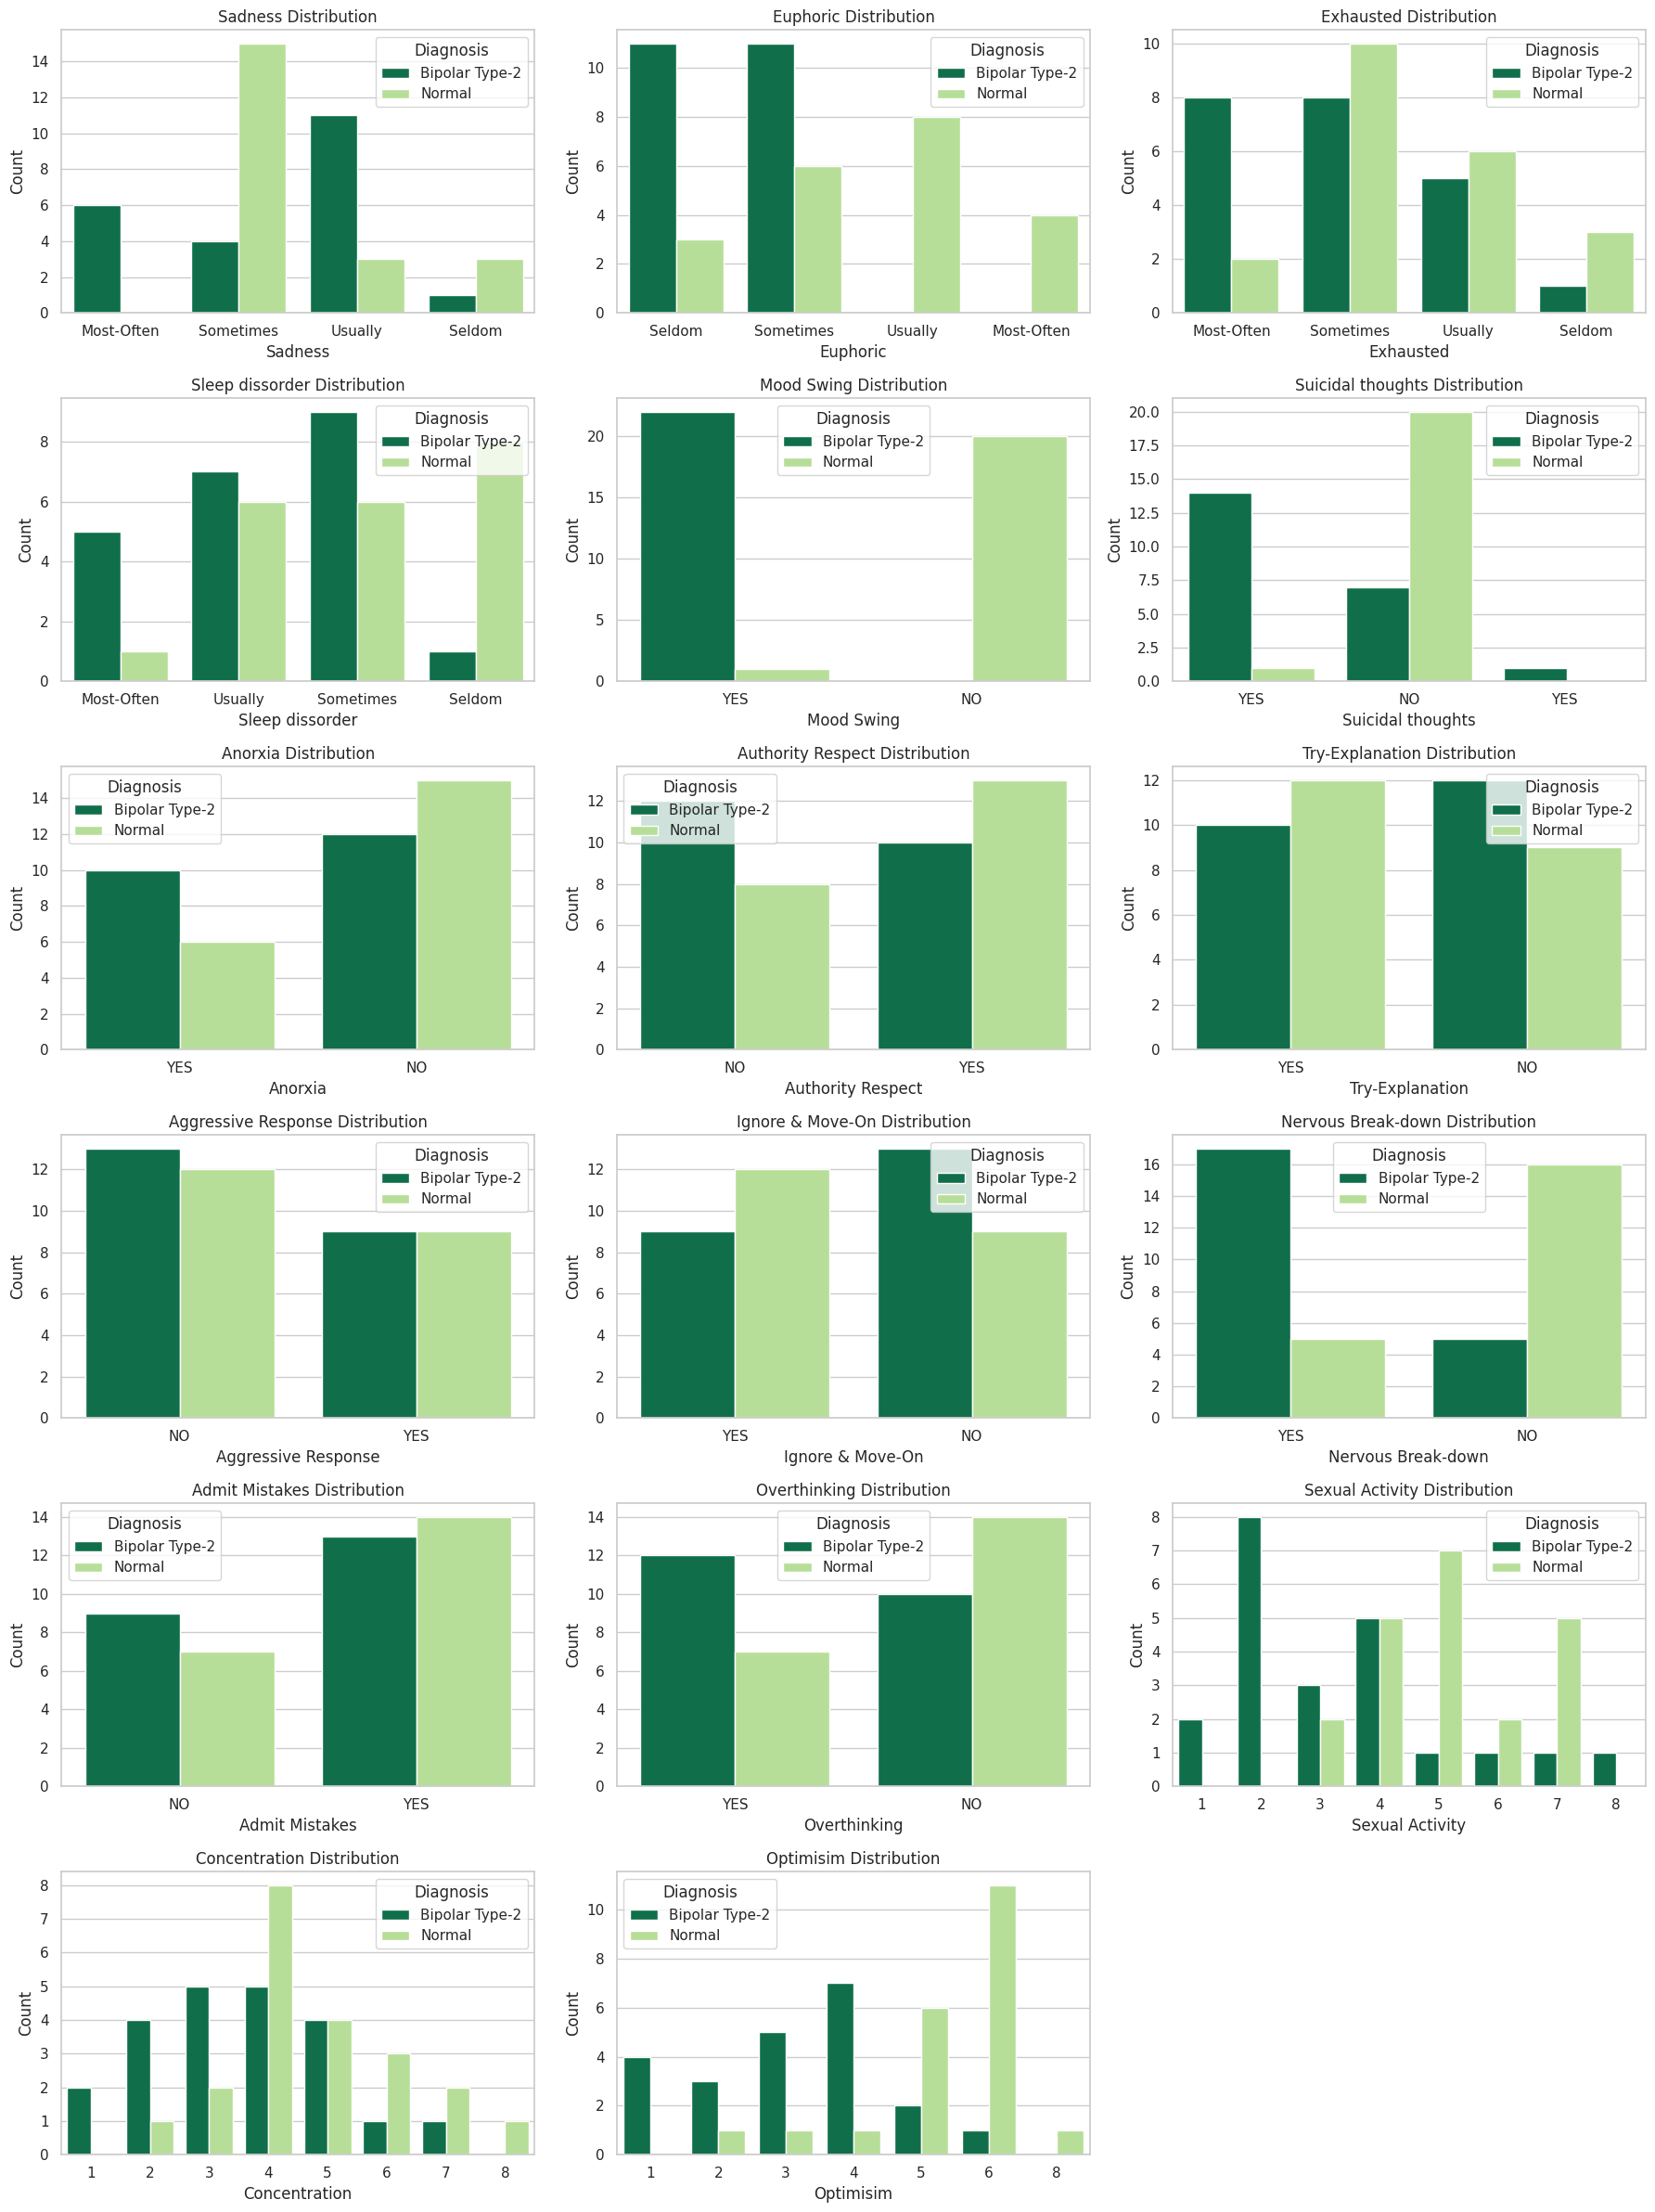

In [55]:
# Filter only 'Normal' and 'Bipolar Type-2' individuals
filtered_df2 = train_df[train_df['Expert Diagnose'].isin(['Normal', 'Bipolar Type-2'])].copy()

# Identify symptom columns (excluding patient ID and diagnosis)
exclude_cols = ['Patient Number', 'Expert Diagnose']
symptom_columns = [col for col in filtered_df2.columns if col not in exclude_cols]

# Set plot style
sns.set(style='whitegrid')
num_cols = 3
num_rows = (len(symptom_columns) + num_cols - 1) // num_cols

# Define custom color palette
custom_palette = {'Normal': '#b5ea8c', 'Bipolar Type-2': '#007f4e'}

# Create grouped bar plots
plt.figure(figsize=(6 * num_cols, 4 * num_rows))
for i, symptom in enumerate(symptom_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    ax = sns.countplot(data=filtered_df2, x=symptom, hue='Expert Diagnose', palette=custom_palette)
    plt.title(f'{symptom} Distribution')
    plt.xlabel(symptom)
    plt.ylabel('Count')
    plt.legend(title='Diagnosis')

plt.tight_layout()
plt.show()


#### Mood swing Bipolar Type 2 vs Normal

In [56]:
from scipy.stats import chi2_contingency

# Filter only Normal and Bipolar Type-2 cases
subset_df = train_df[train_df['Expert Diagnose'].isin(['Normal', 'Bipolar Type-2'])]

# Create a contingency table
contingency_table = pd.crosstab(subset_df['Mood Swing'], subset_df['Expert Diagnose'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Result for Mood Swing vs Diagnosis (Normal vs Bipolar Type-2)")
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

# Optional: Check significance
alpha = 0.05
if p < alpha:
    print("✅ Statistically significant difference in Mood Swing distribution between Normal and Bipolar Type-2.")
else:
    print("❌ No significant difference in Mood Swing distribution.")


Chi-Square Test Result for Mood Swing vs Diagnosis (Normal vs Bipolar Type-2)
Chi2 Statistic: 35.44
Degrees of Freedom: 1
P-value: 0.0000
✅ Statistically significant difference in Mood Swing distribution between Normal and Bipolar Type-2.


In [57]:
# Check if any expected frequencies are below 5
print("Expected Frequencies:")
print(expected)

if (expected < 5).any():
    print("⚠️ Warning: Some expected counts are less than 5. Chi-square results may not be valid.")
else:
    print("✅ All expected counts are ≥ 5. Assumptions met.")


Expected Frequencies:
[[10.23255814  9.76744186]
 [11.76744186 11.23255814]]
✅ All expected counts are ≥ 5. Assumptions met.


#### Concentration Bipolar Type 2 vs Normal

In [58]:
from scipy.stats import mannwhitneyu

# Filter groups
group1 = train_df[train_df['Expert Diagnose'] == 'Normal']['Concentration']
group2 = train_df[train_df['Expert Diagnose'] == 'Bipolar Type-2']['Concentration']

# Run test
stat, p = mannwhitneyu(group1, group2, alternative='greater')
print(f"Mann–Whitney U Test p-value: {p:.4f}")

if p < 0.05:
    print("✅ Significant difference in Concentration levels between groups.")
else:
    print("❌ No significant difference.")

Mann–Whitney U Test p-value: 0.0086
✅ Significant difference in Concentration levels between groups.


#### Sadness Bipolar Type 2 vs Normal

In [59]:
# Make a copy to preserve the original data
train_df2 = train_df.copy()

# Define ordinal mapping
ordinal_map = {
    'Seldom': 1,
    'Sometimes': 2,
    'Usually': 3,
    'often': 4
}

# Apply mapping to the copied dataframe
train_df2['Sadness_Ordinal'] = train_df2['Sadness'].map(ordinal_map)
from scipy.stats import mannwhitneyu

group1 = train_df2[train_df2['Expert Diagnose'] == 'Normal']['Sadness_Ordinal'].dropna()
group2 = train_df2[train_df2['Expert Diagnose'] == 'Bipolar Type-2']['Sadness_Ordinal'].dropna()

if len(group1) > 0 and len(group2) > 0:
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
    print(f"Mann–Whitney U Test p-value: {p:.4f}")

    if p < 0.05:
        print("✅ Significant difference in Sadness levels between groups.")
    else:
        print("❌ No significant difference.")
else:
    print("⚠️ One of the groups has no data.")


Mann–Whitney U Test p-value: 0.0023
✅ Significant difference in Sadness levels between groups.


####Euphoric Bipolar Type 2 vs Normal

In [60]:
# Apply mapping to the copied dataframe
train_df2['Euphoric_Ordinal'] = train_df2['Euphoric'].map(ordinal_map)
group1 = train_df2[train_df2['Expert Diagnose'] == 'Normal']['Euphoric_Ordinal'].dropna()
group2 = train_df2[train_df2['Expert Diagnose'] == 'Bipolar Type-2']['Euphoric_Ordinal'].dropna()

if len(group1) > 0 and len(group2) > 0:
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
    print(f"Mann–Whitney U Test p-value: {p:.4f}")

    if p < 0.05:
        print("✅ Significant difference in Euphoric levels between groups.")
    else:
        print("❌ No significant difference.")
else:
    print("⚠️ One of the groups has no data.")

Mann–Whitney U Test p-value: 0.0015
✅ Significant difference in Euphoric levels between groups.


## Depression

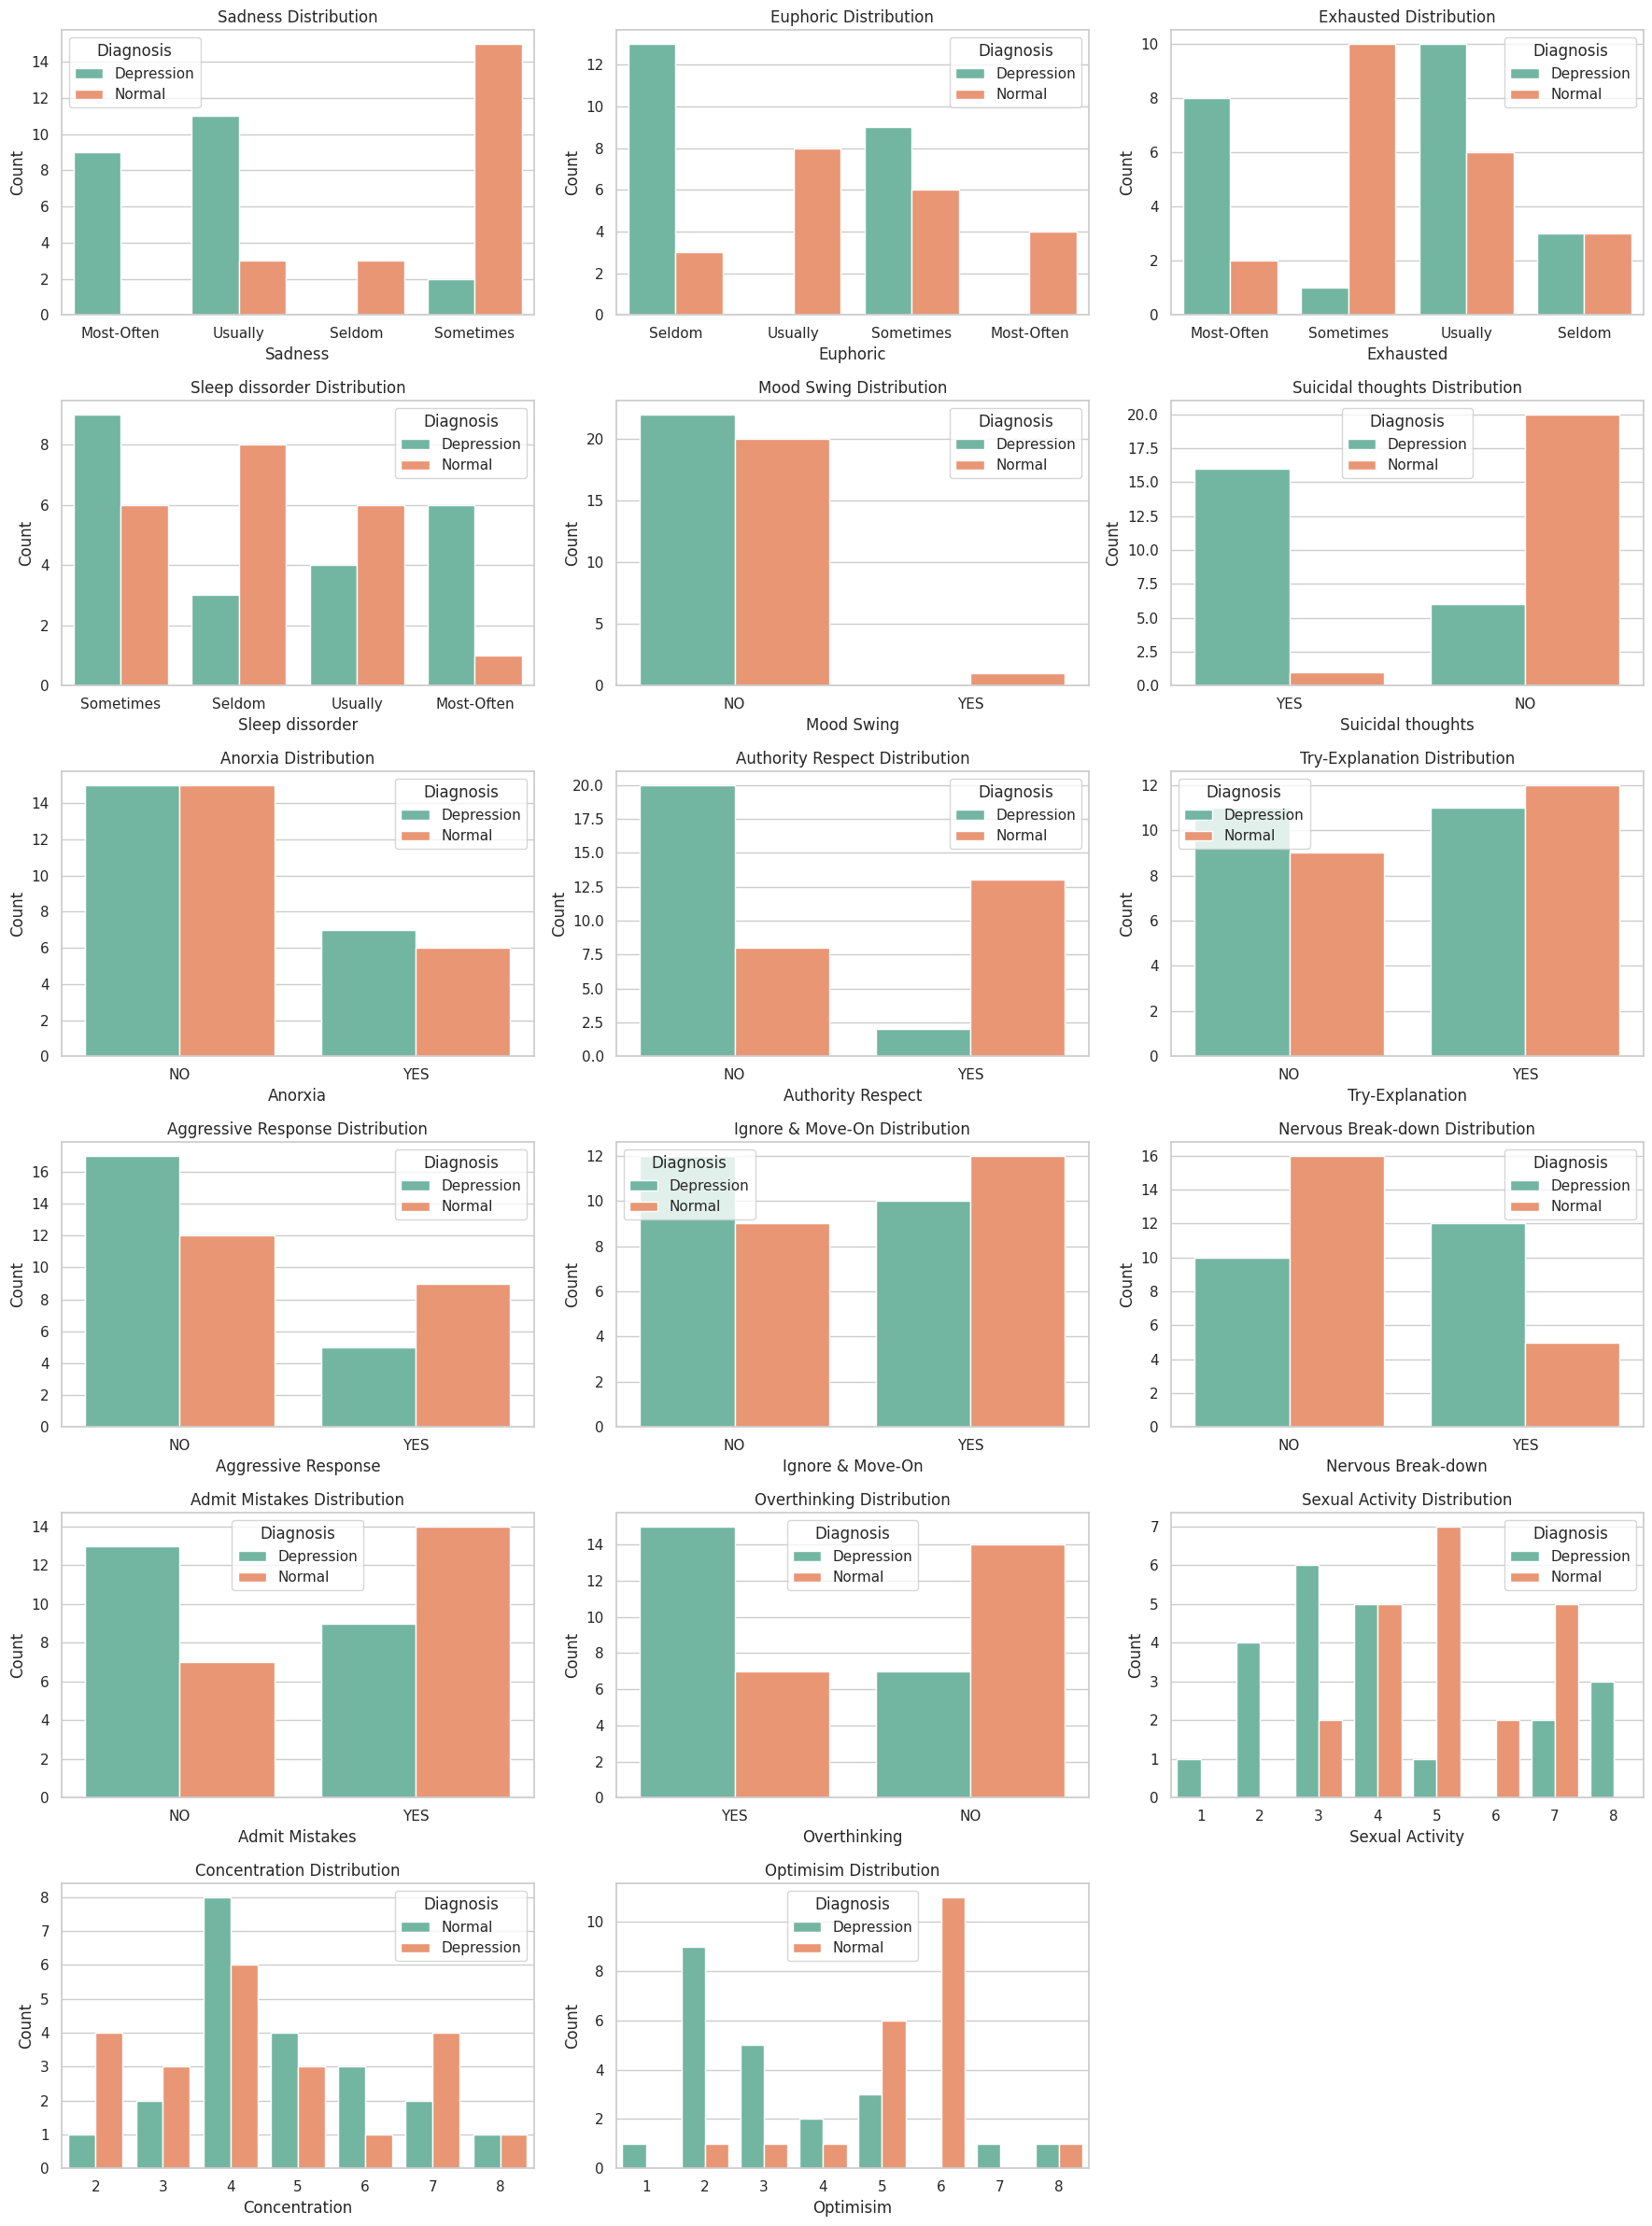

In [61]:
# Filter only 'Normal' and 'Depression' individuals
filtered_df3 = train_df[train_df['Expert Diagnose'].isin(['Normal', 'Depression'])].copy()

# Identify symptom columns (excluding patient ID and diagnosis)
exclude_cols = ['Patient Number', 'Expert Diagnose']
symptom_columns = [col for col in filtered_df3.columns if col not in exclude_cols]

# Set plot style
sns.set(style='whitegrid')
num_cols = 3
num_rows = (len(symptom_columns) + num_cols - 1) // num_cols

# Create grouped bar plots
plt.figure(figsize=(6 * num_cols, 4 * num_rows))
for i, symptom in enumerate(symptom_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    ax = sns.countplot(data=filtered_df3, x=symptom, hue='Expert Diagnose', palette='Set2')
    plt.title(f'{symptom} Distribution')
    plt.xlabel(symptom)
    plt.ylabel('Count')
    plt.legend(title='Diagnosis')

plt.tight_layout()
plt.show()


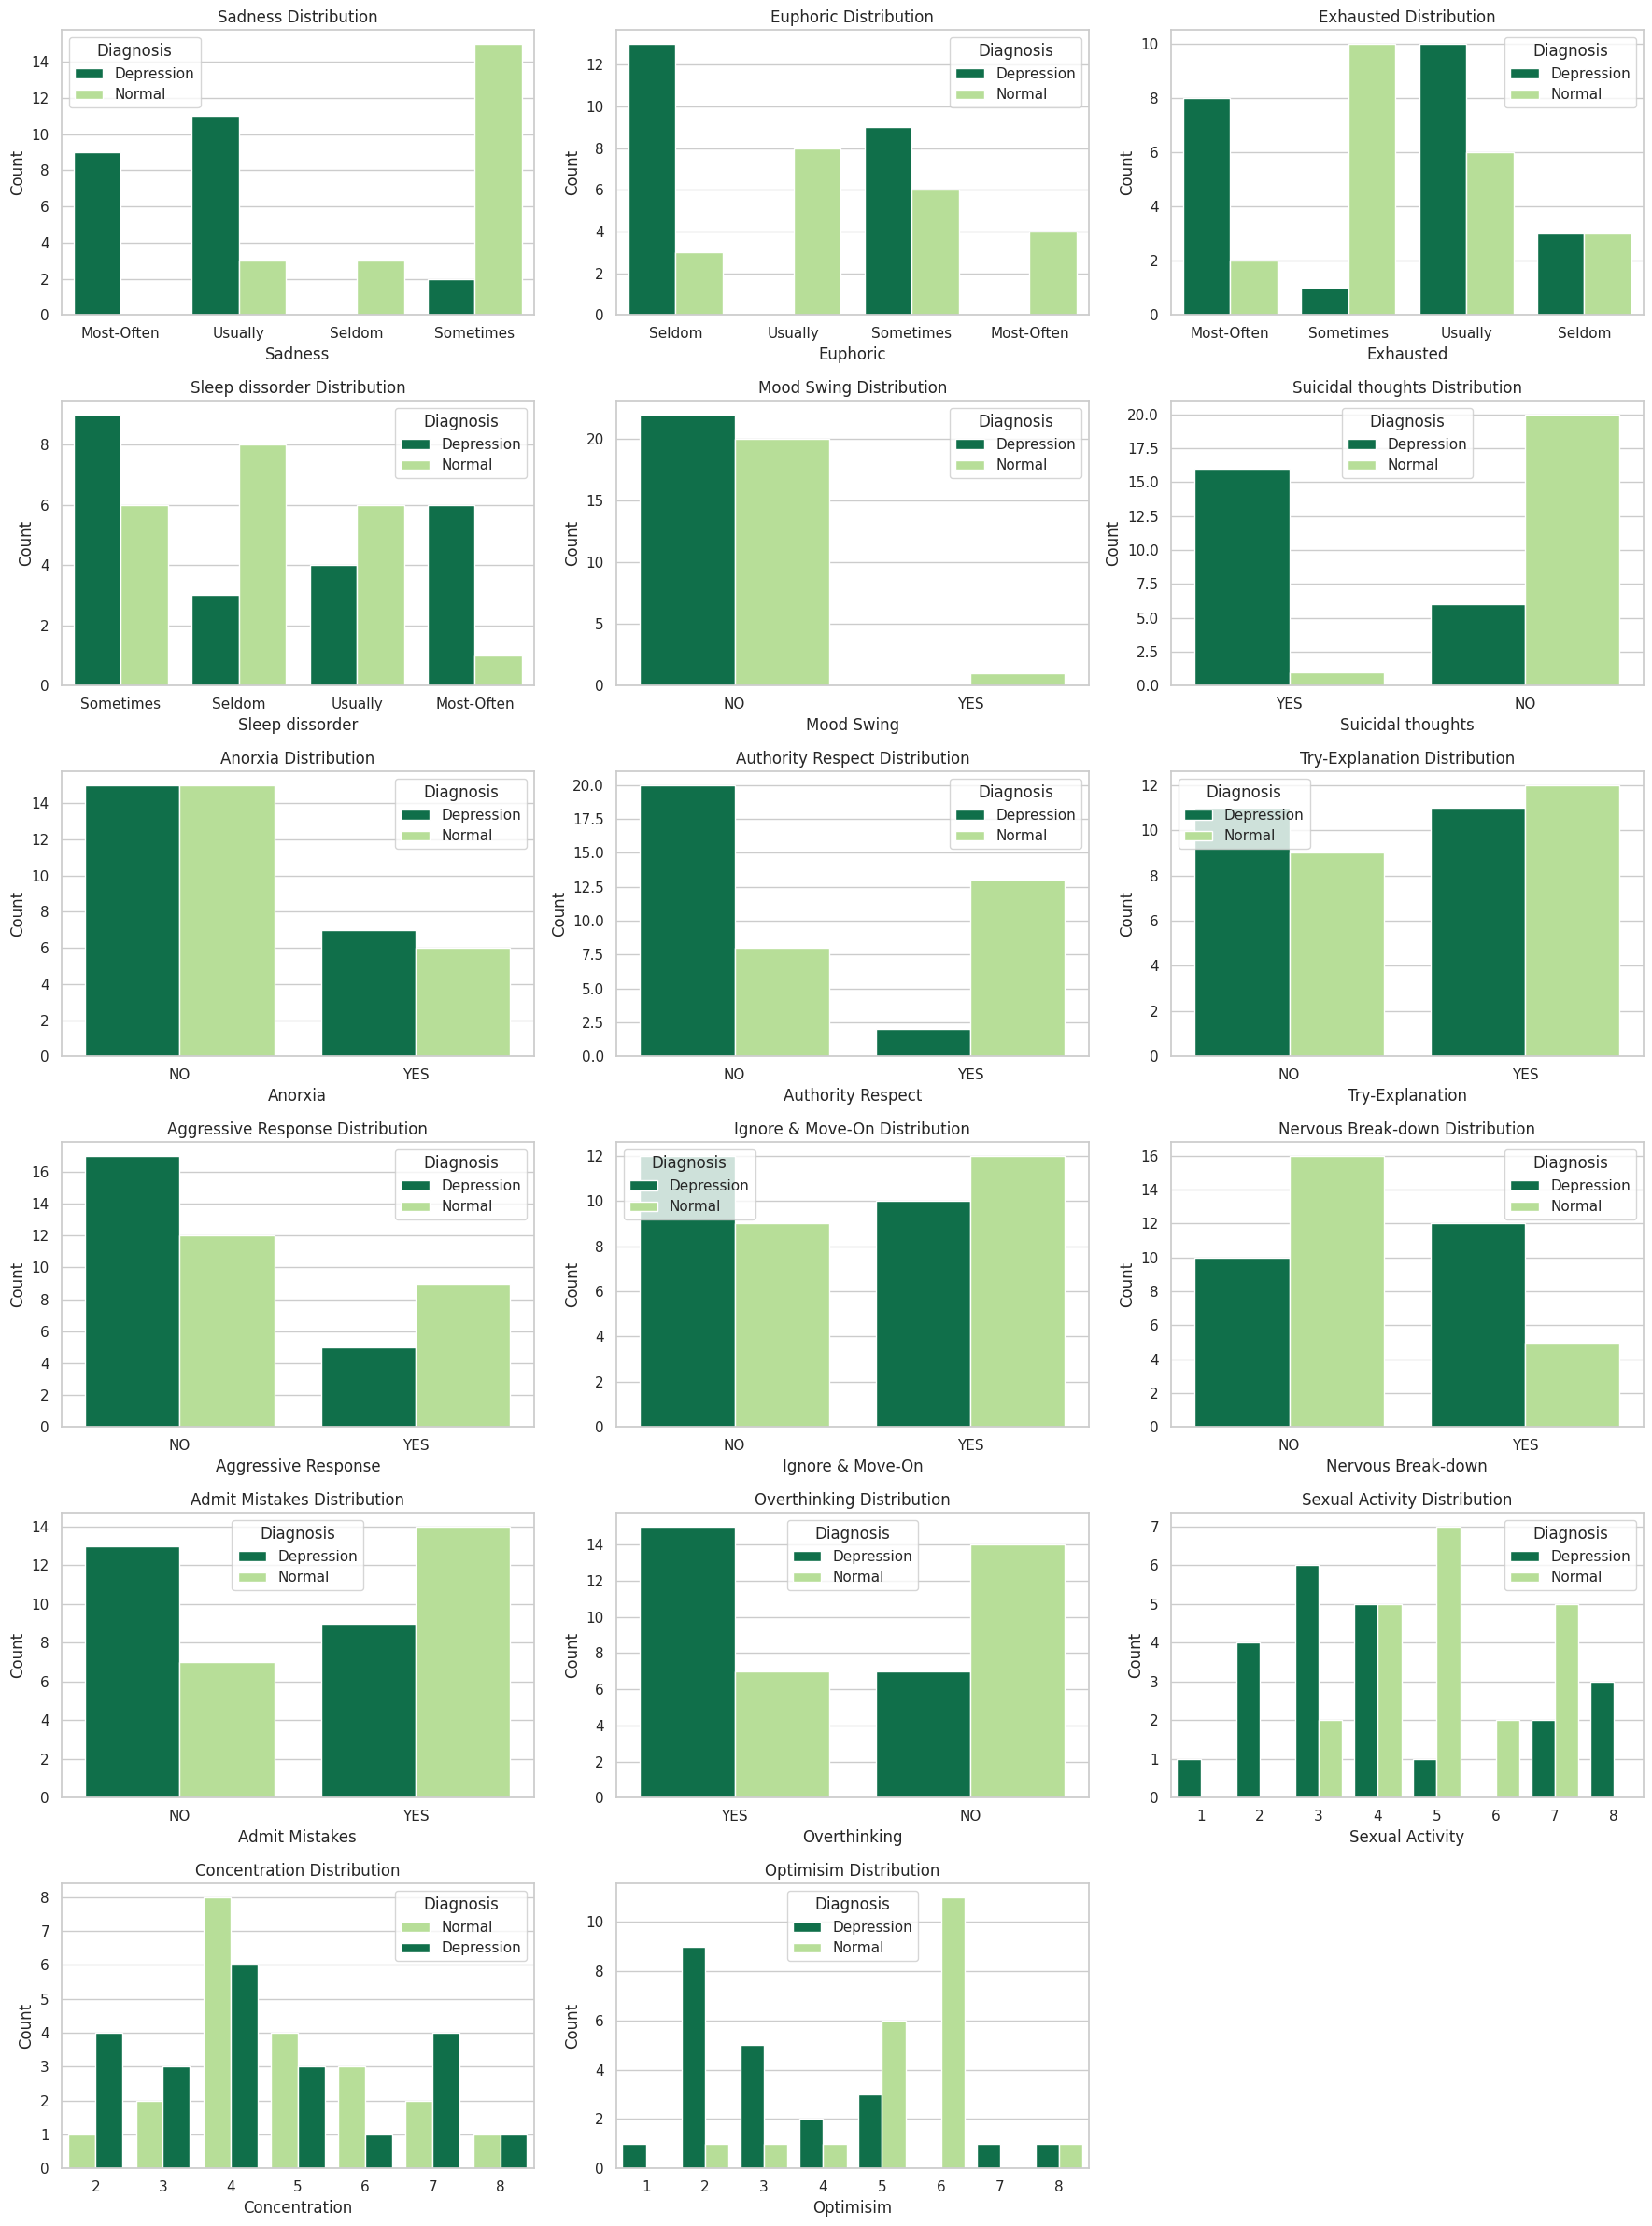

In [62]:
# Filter only 'Normal' and 'Depression' individuals
filtered_df3 = train_df[train_df['Expert Diagnose'].isin(['Normal', 'Depression'])].copy()

# Identify symptom columns (excluding patient ID and diagnosis)
exclude_cols = ['Patient Number', 'Expert Diagnose']
symptom_columns = [col for col in filtered_df3.columns if col not in exclude_cols]

# Set plot style
sns.set(style='whitegrid')
num_cols = 3
num_rows = (len(symptom_columns) + num_cols - 1) // num_cols

# Define custom color palette
custom_palette = {'Normal': '#b5ea8c', 'Depression': '#007f4e'}

# Create grouped bar plots
plt.figure(figsize=(6 * num_cols, 4 * num_rows))
for i, symptom in enumerate(symptom_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    ax = sns.countplot(data=filtered_df3, x=symptom, hue='Expert Diagnose', palette=custom_palette)
    plt.title(f'{symptom} Distribution')
    plt.xlabel(symptom)
    plt.ylabel('Count')
    plt.legend(title='Diagnosis')

plt.tight_layout()
plt.show()


#### Suicidal Thoughts between Depression vs Normal

In [63]:
# Filter only Normal and Depression cases
subset_df = train_df[train_df['Expert Diagnose'].isin(['Normal', 'Depression'])].copy()

# Create a contingency table
contingency_table = pd.crosstab(subset_df['Suicidal thoughts'], subset_df['Expert Diagnose'])

print("Contingency Table:")
print(contingency_table)

# Run Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

# Optional: Check significance level
alpha = 0.05
if p < alpha:
    print("✅ Statistically significant difference in Suicidal Thoughts between Normal and Depressed individuals.")
else:
    print("❌ No significant difference in Suicidal Thoughts between the groups.")

Contingency Table:
Expert Diagnose    Depression  Normal
Suicidal thoughts                    
NO                          6      20
YES                        16       1

Chi-Square Test Results:
Chi2 Statistic: 18.02
P-value: 0.0000
Degrees of Freedom: 1
✅ Statistically significant difference in Suicidal Thoughts between Normal and Depressed individuals.


In [64]:
# Flatten expected counts array for easier checking
expected_flat = expected.flatten()

# Count how many expected counts are >= 5
num_cells = len(expected_flat)
cells_ge_5 = sum(expected_flat >= 5)
cells_lt_1 = sum(expected_flat < 1)

# Print all expected values
print("\nExpected Frequencies:")
print(pd.DataFrame(expected,
                   index=contingency_table.index,
                   columns=contingency_table.columns))

# Check assumption
if cells_ge_5 / num_cells >= 0.8 and cells_lt_1 == 0:
    print("✅ Assumption satisfied: At least 80% of expected counts are ≥ 5, and none < 1.")
else:
    print("⚠️ Assumption NOT satisfied: Consider using Fisher’s Exact Test instead.")



Expected Frequencies:
Expert Diagnose    Depression     Normal
Suicidal thoughts                       
NO                  13.302326  12.697674
YES                  8.697674   8.302326
✅ Assumption satisfied: At least 80% of expected counts are ≥ 5, and none < 1.


#### Overthnking between Depression vs Normal

In [65]:
# Create a contingency table
contingency_table2 = pd.crosstab(subset_df['Overthinking'], subset_df['Expert Diagnose'])

print("Contingency Table:")
print(contingency_table2)

# Run Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table2)

print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

# Optional: Check significance level
alpha = 0.05
if p < alpha:
    print("✅ Statistically significant difference in overthinking between Normal and Depressed individuals.")
else:
    print("❌ No significant difference in overthinking between the groups.")

Contingency Table:
Expert Diagnose  Depression  Normal
Overthinking                       
NO                        7      14
YES                      15       7

Chi-Square Test Results:
Chi2 Statistic: 3.92
P-value: 0.0477
Degrees of Freedom: 1
✅ Statistically significant difference in overthinking between Normal and Depressed individuals.


In [66]:
# CHECKING ASSUMPTIONS

# Flatten expected values
expected_flat = expected.flatten()

# Count expected cells >= 5 and < 1
num_cells = len(expected_flat)
cells_ge_5 = sum(expected_flat >= 5)
cells_lt_1 = sum(expected_flat < 1)

# Print expected table
print("\nExpected Frequencies:")
print(pd.DataFrame(expected,
                   index=contingency_table2.index,
                   columns=contingency_table2.columns))

# Assumption check
if cells_ge_5 / num_cells >= 0.8 and cells_lt_1 == 0:
    print("✅ Assumption satisfied: At least 80% of expected counts are ≥ 5, and none < 1.")
else:
    print("⚠️ Assumption NOT satisfied: Consider using Fisher’s Exact Test instead.")


Expected Frequencies:
Expert Diagnose  Depression     Normal
Overthinking                          
NO                10.744186  10.255814
YES               11.255814  10.744186
✅ Assumption satisfied: At least 80% of expected counts are ≥ 5, and none < 1.


#### Optimism between Depression vs Normal

In [67]:
from scipy.stats import mannwhitneyu

# Filter the two groups for the 'Optimism' column
optimism_depressed = filtered_df3[filtered_df3['Expert Diagnose'] == 'Depression']['Optimisim']
optimism_normal = filtered_df3[filtered_df3['Expert Diagnose'] == 'Normal']['Optimisim']

# Perform Mann–Whitney U test
stat, p_value = mannwhitneyu(optimism_depressed, optimism_normal, alternative='two-sided')

# Print the result
print("Mann–Whitney U test for Optimism:")
print(f"U statistic = {stat}")
print(f"P-value = {p_value:.4f}")

# Optional interpretation
if p_value < 0.05:
    print("✅ There is a statistically significant difference in optimism levels between the groups.")
else:
    print("❌ No statistically significant difference in optimism levels between the groups.")

Mann–Whitney U test for Optimism:
U statistic = 75.5
P-value = 0.0001
✅ There is a statistically significant difference in optimism levels between the groups.


In [68]:
# Define the correct order of levels (from least to most sad)
sadness_order = ['Seldom', 'Sometimes', 'Usually', 'Most-often']

# Convert to ordered categorical type, then to numerical codes
filtered_df3['Sadness_num'] = filtered_df3['Sadness'].astype(pd.api.types.CategoricalDtype(categories=sadness_order, ordered=True)).cat.codes


#### Sadness between Depression vs Normal

In [69]:
from scipy.stats import mannwhitneyu

# Split by diagnosis
sadness_depressed = filtered_df3[filtered_df3['Expert Diagnose'] == 'Depression']['Sadness_num']
sadness_normal = filtered_df3[filtered_df3['Expert Diagnose'] == 'Normal']['Sadness_num']

# Perform Mann–Whitney U test
stat, p = mannwhitneyu(sadness_depressed, sadness_normal, alternative='two-sided')

print("Mann–Whitney U test for Sadness levels:")
print(f"U statistic = {stat}")
print(f"P-value = {p:.4f}")

# Optional interpretation
if p < 0.05:
    print("✅ Statistically significant difference in sadness levels between groups.")
else:
    print("❌ No significant difference in sadness levels between groups.")


Mann–Whitney U test for Sadness levels:
U statistic = 235.5
P-value = 0.9182
❌ No significant difference in sadness levels between groups.


## Bipolar Type 1 vs Bipolar Type 2

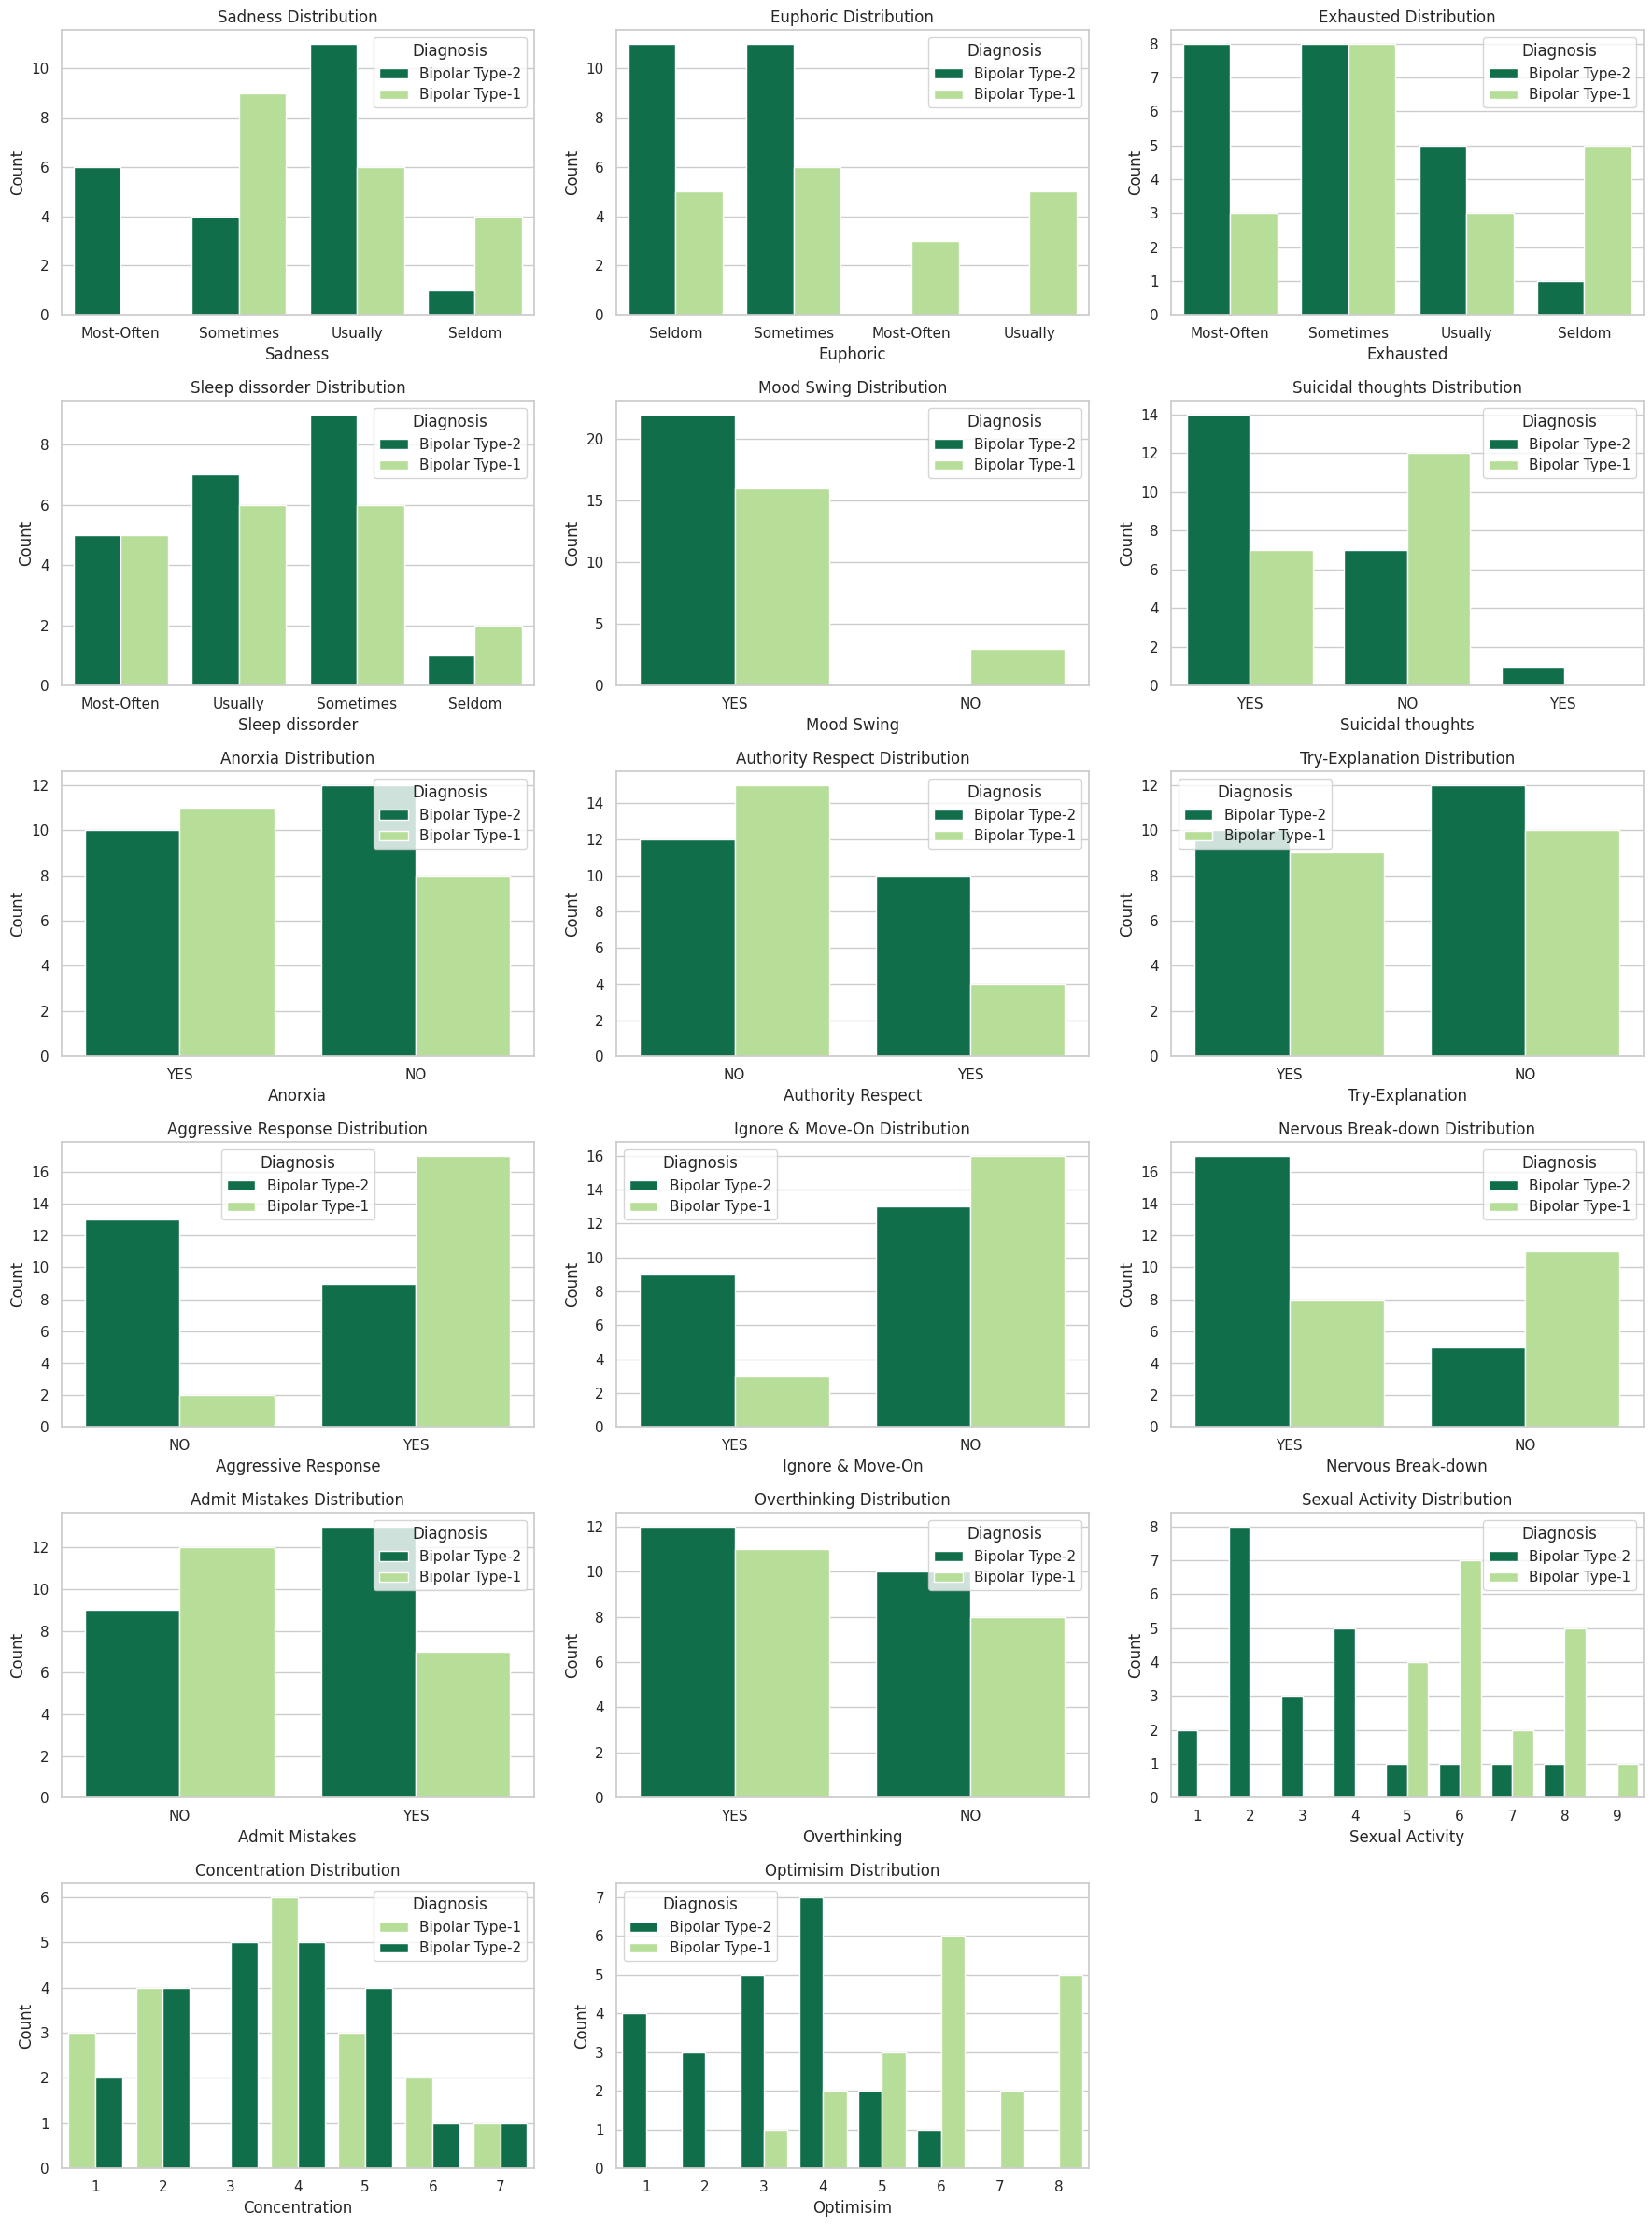

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the relevant diagnostic groups
bipolar_df = train_df[train_df['Expert Diagnose'].isin(['Bipolar Type-1', 'Bipolar Type-2'])].copy()

# Exclude non-symptom columns
exclude_cols = ['Patient Number', 'Expert Diagnose']
symptom_columns = [col for col in bipolar_df.columns if col not in exclude_cols]

# Set up the plot grid
num_cols = 3
num_rows = (len(symptom_columns) + num_cols - 1) // num_cols
plt.figure(figsize=(6 * num_cols, 4 * num_rows))

# Custom color palette for diagnoses
custom_palette ={'Bipolar Type-1': '#b5ea8c', 'Bipolar Type-2': '#007f4e'}

# Generate grouped bar plots
for i, symptom in enumerate(symptom_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(data=bipolar_df, x=symptom, hue='Expert Diagnose', palette=custom_palette)
    plt.title(f'{symptom} Distribution')
    plt.xlabel(symptom)
    plt.ylabel('Count')
    plt.legend(title='Diagnosis')

plt.tight_layout()
plt.show()


#### Sadness between Bipolar Type 1 vs Bipolar Type 2

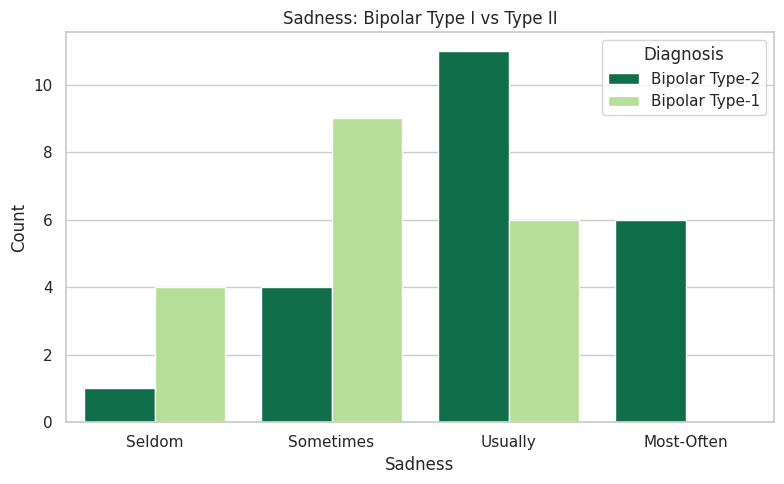

In [71]:
# Define the order for the x-axis
sadness_order = ['Seldom', 'Sometimes', 'Usually', 'Most-Often']

# Filter for only Bipolar Type-1 and Type-2
bipolar_df = train_df[train_df['Expert Diagnose'].isin(['Bipolar Type-1', 'Bipolar Type-2'])]

# Define custom color palette
custom_palette = {'Bipolar Type-1': '#b5ea8c', 'Bipolar Type-2': '#007f4e'}

plt.figure(figsize=(8, 5))
sns.countplot(data=bipolar_df, x='Sadness', hue='Expert Diagnose',
              palette=custom_palette, order=sadness_order)
plt.title('Sadness: Bipolar Type I vs Type II')
plt.xlabel('Sadness')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()


In [72]:
# Make a copy to preserve the original data
train_df2 = train_df.copy()

# Define ordinal mapping
ordinal_map = {
    'Seldom': 1,
    'Sometimes': 2,
    'Usually': 3,
    'Most-Often': 4
}

# Apply mapping to the copied dataframe
train_df2['Sadness_Ordinal'] = train_df2['Sadness'].map(ordinal_map)
from scipy.stats import mannwhitneyu

group1 = train_df2[train_df2['Expert Diagnose'] == 'Bipolar Type-1']['Sadness_Ordinal'].dropna()
group2 = train_df2[train_df2['Expert Diagnose'] == 'Bipolar Type-2']['Sadness_Ordinal'].dropna()

if len(group1) > 0 and len(group2) > 0:
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
    print(f"Mann–Whitney U Test p-value: {p:.4f}")

    if p < 0.05:
        print("✅ Significant difference in Sadness levels between groups.")
    else:
        print("❌ No significant difference.")
else:
    print("⚠️ One of the groups has no data.")


Mann–Whitney U Test p-value: 0.0013
✅ Significant difference in Sadness levels between groups.


#### Euphoric between Bipolar Type 1 vs Bipolar Type 2

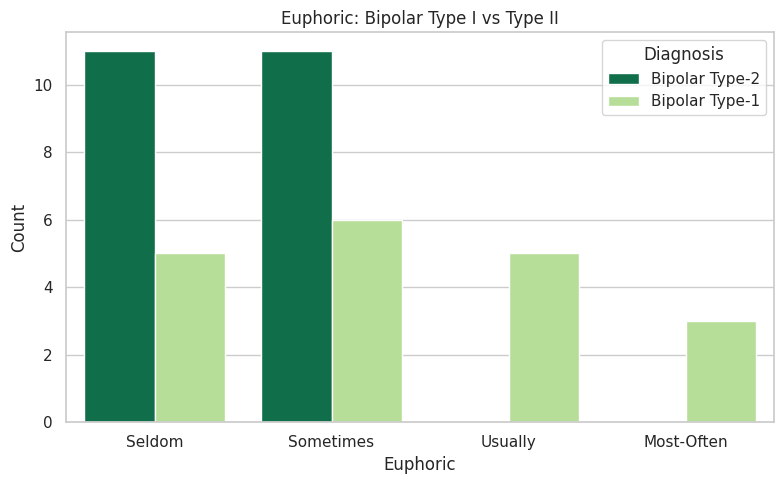

In [73]:
# Define the order for the x-axis
Euphoric_order = ['Seldom', 'Sometimes', 'Usually', 'Most-Often']

# Filter for only Bipolar Type-1 and Type-2
bipolar_df = train_df[train_df['Expert Diagnose'].isin(['Bipolar Type-1', 'Bipolar Type-2'])]

plt.figure(figsize=(8, 5))
sns.countplot(data=bipolar_df, x='Euphoric', hue='Expert Diagnose',
              palette=custom_palette, order=Euphoric_order)
plt.title('Euphoric: Bipolar Type I vs Type II')
plt.xlabel('Euphoric')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()


In [74]:
# Apply mapping to the copied dataframe
train_df2['Euphoric_Ordinal'] = train_df2['Euphoric'].map(ordinal_map)
group1 = train_df2[train_df2['Expert Diagnose'] == 'Bipolar Type-1']['Euphoric_Ordinal'].dropna()
group2 = train_df2[train_df2['Expert Diagnose'] == 'Bipolar Type-2']['Euphoric_Ordinal'].dropna()

if len(group1) > 0 and len(group2) > 0:
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
    print(f"Mann–Whitney U Test p-value: {p:.4f}")

    if p < 0.05:
        print("✅ Significant difference in Euphoric levels between groups.")
    else:
        print("❌ No significant difference.")
else:
    print("⚠️ One of the groups has no data.")

Mann–Whitney U Test p-value: 0.0090
✅ Significant difference in Euphoric levels between groups.


#### Aggressive Response and Nervous Breakdown between Bipolar Type 1 vs Bipolar Type 2

In [75]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create subset for Bipolar Type-1 and Type-2
subset_df = train_df[train_df['Expert Diagnose'].isin(['Bipolar Type-1', 'Bipolar Type-2'])].copy()

def chi_square_test(variable):
    table = pd.crosstab(subset_df[variable], subset_df['Expert Diagnose'])
    chi2, p, dof, expected = chi2_contingency(table)

    print(f"\nChi-Square Test for '{variable}':")
    print("Contingency Table:")
    print(table)
    print(f"Chi2 Statistic: {chi2:.2f}")
    print(f"P-value: {p:.4f}")

    # Assumption checking
    expected_flat = expected.flatten()
    below_5 = sum(expected_flat < 5)
    below_1 = sum(expected_flat < 1)
    total_cells = expected.size
    percent_below_5 = (below_5 / total_cells) * 100

    print("\nAssumption Check:")
    print(f"- Expected counts < 5: {below_5} cell(s) ({percent_below_5:.1f}% of total)")
    print(f"- Expected counts < 1: {below_1} cell(s)")
    if below_1 > 0 or percent_below_5 > 20:
        print("❌ Assumption violated: Chi-square test may not be valid.")
    else:
        print("✅ Assumptions met: Chi-square test is valid.")

    # Interpretation
    if p < 0.05:
        print("✅ Statistically significant difference between Bipolar Type-1 and Type-2.")
    else:
        print("❌ No significant difference between the groups.")

# Apply test for both variables
chi_square_test('Nervous Break-down')
chi_square_test('Aggressive Response')




Chi-Square Test for 'Nervous Break-down':
Contingency Table:
Expert Diagnose     Bipolar Type-1  Bipolar Type-2
Nervous Break-down                                
NO                              11               5
YES                              8              17
Chi2 Statistic: 3.92
P-value: 0.0476

Assumption Check:
- Expected counts < 5: 0 cell(s) (0.0% of total)
- Expected counts < 1: 0 cell(s)
✅ Assumptions met: Chi-square test is valid.
✅ Statistically significant difference between Bipolar Type-1 and Type-2.

Chi-Square Test for 'Aggressive Response':
Contingency Table:
Expert Diagnose      Bipolar Type-1  Bipolar Type-2
Aggressive Response                                
NO                                2              13
YES                              17               9
Chi2 Statistic: 8.38
P-value: 0.0038

Assumption Check:
- Expected counts < 5: 0 cell(s) (0.0% of total)
- Expected counts < 1: 0 cell(s)
✅ Assumptions met: Chi-square test is valid.
✅ Statistically signifi

#### Sexual Activity between Bipolar Type 1 vs Bipolar Type 2

In [76]:
# Filter for Bipolar Type-1 and Type-2
bipolar_df = train_df[train_df['Expert Diagnose'].isin(['Bipolar Type-1', 'Bipolar Type-2'])]

# Extract sexual activity ratings
type1_activity = bipolar_df[bipolar_df['Expert Diagnose'] == 'Bipolar Type-1']['Sexual Activity']
type2_activity = bipolar_df[bipolar_df['Expert Diagnose'] == 'Bipolar Type-2']['Sexual Activity']

# Run the Mann-Whitney U test
stat, p = mannwhitneyu(type1_activity, type2_activity, alternative='two-sided')

# Output
print(f"U statistic: {stat:.3f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("✅ Significant difference in sexual activity between Bipolar Type 1 and Type 2.")
else:
    print("❌ No significant difference in sexual activity between Bipolar Type 1 and Type 2.")

U statistic: 381.000
P-value: 0.0000
✅ Significant difference in sexual activity between Bipolar Type 1 and Type 2.


## Check Association between Variables

In [77]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))


In [78]:
# Get list of predictor (symptom) columns only
predictor_columns = [col for col in train_df.columns if col not in ['Patient Number', 'Expert Diagnose']]

# Create empty DataFrame for results
cramers_matrix = pd.DataFrame(index=predictor_columns, columns=predictor_columns)

# Fill the matrix with Cramér’s V values
for col1 in predictor_columns:
    for col2 in predictor_columns:
        cramers_matrix.loc[col1, col2] = cramers_v(train_df[col1], train_df[col2])

# Convert values to float
cramers_matrix = cramers_matrix.astype(float)


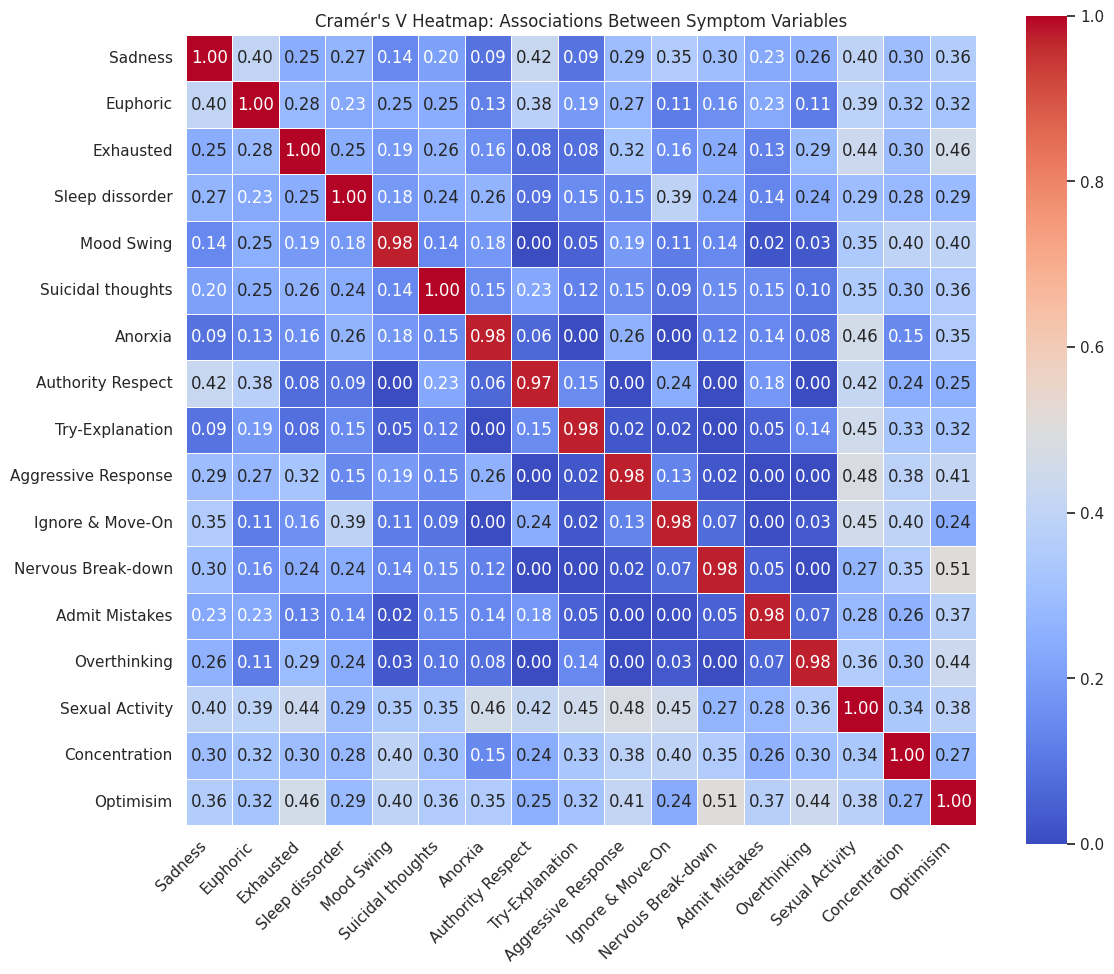

In [79]:
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Cramér's V Heatmap: Associations Between Symptom Variables")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
